# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hendrika Rosa Vincensia Kaluge
- **Email:** erikakaluge175@gmail.com
- **ID Dicoding:** erika_kaluge

## Menentukan Pertanyaan Bisnis

- Bagaimana pola rata-rata penyewaan sepeda di setiap musim (**season**)?
- Bagaimana pengaruh cuaca (**weathersit**) dan hari kerja (**workingday**) terhadap tingkat sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [3]:
hour_df= pd.read_csv('https://raw.githubusercontent.com/ericaishere/bike-sharing-data-analysis/main/data/day.csv')
day_df= pd.read_csv('https://raw.githubusercontent.com/ericaishere/bike-sharing-data-analysis/main/data/hour.csv')

**Karakteristik Dataset:**

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_df.info()
hour_df.shape

day_df.info()
day_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(17379, 17)

In [7]:
main_df = pd.merge(hour_df, day_df, on='dteday', how='left', suffixes=('_hour', '_day'))
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
main_df.shape

(17379, 32)

**Penjelasan**

Penggabungan data hour.csv dan day.csv dengan metode Left Join:

- Mengambil semua data dari hour.csv.
- Mengambil data dari day.csv yang memiliki kecocokan dengan hour.csv.
- Menghasilkan dataset baru dengan semua informasi dari kedua file.


### Assessing Data

In [9]:
# Check Missing Value

print('Missing Value :')
print(main_df.isnull().sum())

Missing Value :
instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
hr                 0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64


In [10]:
# Check Duplicated
if main_df.duplicated().sum() == 0:
  print('Data Terduplikasi :', main_df.duplicated().sum())
  print("Tidak terdapat data terduplikasi pada main_df.")
else:
  print('Data Terduplikasi :', main_df.duplicated().sum())

Data Terduplikasi : 0
Tidak terdapat data terduplikasi pada main_df.


**Cek Sebaran Keseluruhan Data**

In [11]:
main_df.describe(include='all')

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

In [12]:
# Perubahan Tipe Data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   holiday_hour     17379 non-null  int64  
 6   weekday_hour     17379 non-null  int64  
 7   workingday_hour  17379 non-null  int64  
 8   weathersit_hour  17379 non-null  int64  
 9   temp_hour        17379 non-null  float64
 10  atemp_hour       17379 non-null  float64
 11  hum_hour         17379 non-null  float64
 12  windspeed_hour   17379 non-null  float64
 13  casual_hour      17379 non-null  int64  
 14  registered_hour  17379 non-null  int64  
 15  cnt_hour         17379 non-null  int64  
 16  instant_day      17379 non-null  int64  
 17  season_day  

In [13]:
main_df['dteday'] = pd.to_datetime(main_df['dteday'])
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   holiday_hour     17379 non-null  int64         
 6   weekday_hour     17379 non-null  int64         
 7   workingday_hour  17379 non-null  int64         
 8   weathersit_hour  17379 non-null  int64         
 9   temp_hour        17379 non-null  float64       
 10  atemp_hour       17379 non-null  float64       
 11  hum_hour         17379 non-null  float64       
 12  windspeed_hour   17379 non-null  float64       
 13  casual_hour      17379 non-null  int64         
 14  registered_hour  17379 non-null  int64

adanya ketidaksesuaian tip data di kolom **dteday** dimana berupa **object** dan harus disesuaikan menjadi tipe data **datetime**

In [14]:
# Ubah Kolom yr, mnth, dan weekday menjadi tipe data String

main_df['yr_hour']= main_df['dteday'].dt.year
main_df['yr_day'] = main_df['dteday'].dt.year
main_df['mnth_hour'] = main_df['dteday'].dt.month_name()
main_df['mnth_day'] = main_df['dteday'].dt.month_name()
main_df['weekday_hour']=main_df['dteday'].dt.day_name()
main_df['weekday_day']=main_df['dteday'].dt.day_name()

In [15]:
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# Pemetaan Kolom Season menurut angka

season = {
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter'
}

main_df['season_hour'] = main_df['season_hour'].map(season)
main_df['season_day'] = main_df['season_day'].map(season)

In [17]:
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,...,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# Pemetaan Kolom weathersit menurut angka

weathersit = {
    1: 'Sunny',
    2: 'Cloudy Fog',
    3: 'Light Rainfall',
    4: 'Heavy Rainfall'
}

main_df['weathersit_hour'] = main_df['weathersit_hour'].map(weathersit)
main_df['weathersit_day']= main_df['weathersit_day'].map(weathersit)

In [19]:
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy Fog,0.344167,...,Saturday,0,Sunny,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy Fog,0.344167,...,Saturday,0,Sunny,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy Fog,0.344167,...,Saturday,0,Sunny,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy Fog,0.344167,...,Saturday,0,Sunny,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy Fog,0.344167,...,Saturday,0,Sunny,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Pemetaan Kolom workingday
workingday = {
    # if day is neither weekend nor holiday is 1, otherwise is 0.
    0: 'holiday',
    1: 'work'
}

main_df['workingday_day']= main_df['workingday_day'].map(workingday)
main_df['workingday_hour']=main_df['workingday_hour'].map(workingday)

In [21]:
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,January,0,Saturday,holiday,Cloudy Fog,0.344167,...,Saturday,holiday,Sunny,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,January,0,Saturday,holiday,Cloudy Fog,0.344167,...,Saturday,holiday,Sunny,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,January,0,Saturday,holiday,Cloudy Fog,0.344167,...,Saturday,holiday,Sunny,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,January,0,Saturday,holiday,Cloudy Fog,0.344167,...,Saturday,holiday,Sunny,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,January,0,Saturday,holiday,Cloudy Fog,0.344167,...,Saturday,holiday,Sunny,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
main_df.to_csv('bikesharing_df.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  object        
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  object        
 5   holiday_hour     17379 non-null  int64         
 6   weekday_hour     17379 non-null  object        
 7   workingday_hour  17379 non-null  object        
 8   weathersit_hour  17379 non-null  object        
 9   temp_hour        17379 non-null  float64       
 10  atemp_hour       17379 non-null  float64       
 11  hum_hour         17379 non-null  float64       
 12  windspeed_hour   17379 non-null  float64       
 13  casual_hour      17379 non-null  int64         
 14  registered_hour  17379 non-null  int64

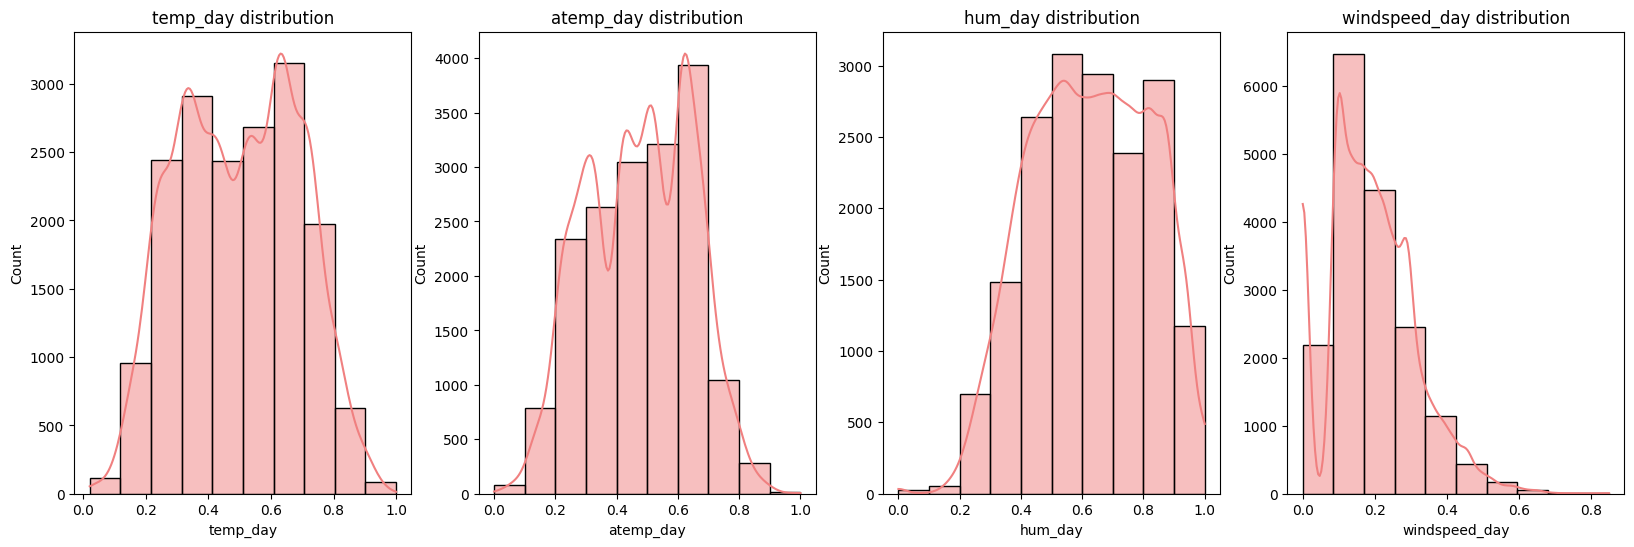

In [24]:
# Persebaran Data

fig, axis =plt.subplots(nrows=1, ncols=4, figsize=(20,6))
columns = ['temp_day', 'atemp_day','hum_day', 'windspeed_day']

for i, ax in enumerate(axis):
  sns.histplot(x=main_df[columns[i]], ax=ax, bins=10, kde=True, color="lightcoral")
  ax.set_title(f"{columns[i]} distribution")

plt.show()


**Penjelasan:**

Analisis distribusi menunjukkan bahwa variabel temperatur harian (**temp_day**), temperatur terasa harian (**atemp_day**), dan kelembapan harian (**hum_day**) mengikuti distribusi normal.
Sementara itu, variabel kecepatan angin harian (**windspeed_day**) menunjukkan distribusi miring ke kanan (**right-skewed distribution**).


**Implikasi:**

Berdasarkan karakteristik distribusi tersebut, keempat variabel ini dapat digunakan dalam analisis selanjutnya tanpa memerlukan transformasi normalisasi.

In [25]:
# Korelasi antara Jumlah sewa dengan temp_day, atemp_day, hum_day, windspeed_day
correlation = main_df.iloc[:,[31, 25, 26, 27, 28]].corr()
correlation

,cnt_day,temp_day,atemp_day,hum_day,windspeed_day
cnt_day,1.000000,0.404772,0.400929,-0.322911,0.093234
temp_day,0.404772,1.000000,0.987672,-0.069881,-0.023125
atemp_day,0.400929,0.987672,1.000000,-0.051918,-0.062336
hum_day,-0.322911,-0.069881,-0.051918,1.000000,-0.290105
windspeed_day,0.093234,-0.023125,-0.062336,-0.290105,1.000000


<Axes: >

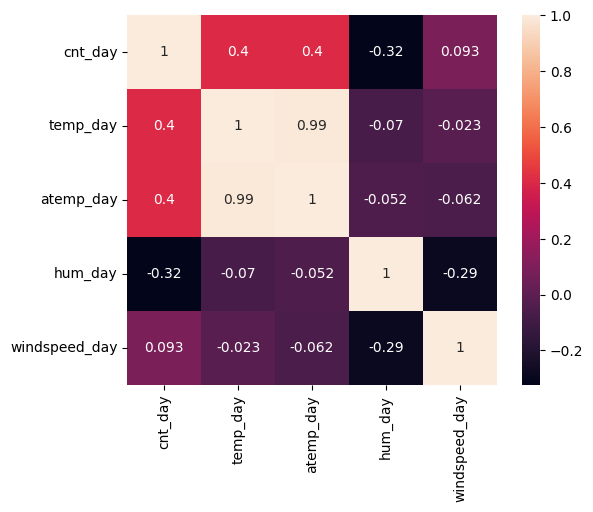

In [26]:
sns.heatmap(correlation, square=True, annot=True)

**Analisis Korelasi:**

- Korelasi positif: Terdapat hubungan positif yang kuat antara total sewa (**cnt_day**) dengan temperatur harian (**temp_day**) dan temperatur terasa (**atemp_day**).
- Korelasi negatif: Terdapat hubungan negatif yang lemah antara total sewa (**cnt_day**) dengan kelembapan harian (**hum_day**) dan kecepatan angin harian (**windspeed_day**).

**Asumsi Perilaku Pelanggan:**

- Cuaca Cerah dan Suhu Hangat: Pelanggan lebih cenderung menyewa sepeda ketika cuaca cerah dan suhu hangat (**temp_day & atemp_day tinggi**).
- Kelembapan Tinggi dan Angin Kencang: Pelanggan cenderung tidak ingin menyewa sepeda saat udara sangat lembab (**hum_day tinggi**) dan kecepatan angin tinggi (**windspeed_day tinggi**).

In [27]:
# Menghitung ringkasan persewaan sepeda harian (berdasarkan tahun, bulan, dan musim)

main_df.groupby(['yr_day', 'mnth_day', 'season_day']).agg({
    'casual_day' : 'sum',
    'registered_day' : 'sum',
    'cnt_day' : 'mean'
}).sort_values(by='cnt_day',ascending=False).reset_index()

,yr_day,mnth_day,season_day,casual_day,registered_day,cnt_day
0,2012,September,Winter,11487,49379,317.010417
1,2012,September,Fall,32291,125416,298.687500
2,2012,August,Fall,43197,171306,288.310484
3,2012,June,Summer,29846,107322,285.766667
4,2012,October,Winter,34538,164303,280.848870
5,2012,July,Fall,41705,161902,273.665323
6,2012,June,Fall,13448,52214,273.591667
7,2012,May,Summer,44235,151630,263.259409
8,2012,April,Summer,38456,135768,242.651811
9,2012,March,Summer,13421,50595,242.484848


**Penjelasan:**

Pada bulan September tahun 2012, saat musim dingin, terjadi puncak jumlah sewa sepeda. Hal ini sejalan dengan korelasi yang ditemukan sebelumnya, di mana musim dingin memiliki tingkat kelembaban udara yang rendah dan kondisi ini mendukung aktivitas bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola rata-rata penyewaan sepeda di setiap musim (**season**)?

In [28]:
season_rent = main_df[['season_day','cnt_day']]

# menggunakan mean untuk rata-rata
season_rent.groupby('season_day')['cnt_day'].mean().sort_values(ascending=False)

season_day
Fall      236.016237
Summer    208.344069
Winter    198.868856
Spring    111.114569
Name: cnt_day, dtype: float64

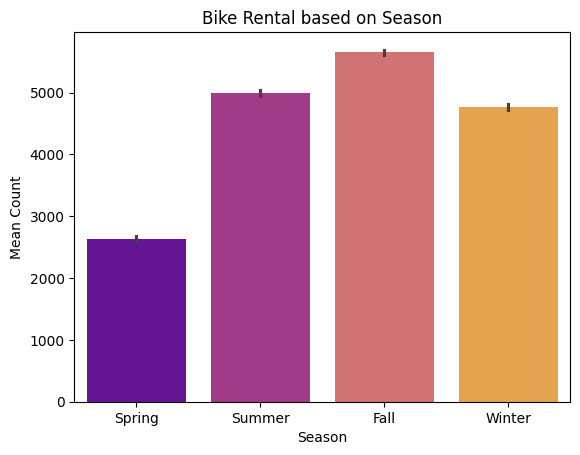

In [ ]:
sns.barplot(
    data=season_rent,
    x='season_day',
    y='cnt_day',
    hue='season_day',
    palette='plasma'
)

plt.title('Bike Rental based on Season')
plt.xlabel("Season")
plt.ylabel("Mean Count")
plt.show()

Dari visualisasi grafik, bisa diketahui penyewaan terbanyak terjadi di musim gugur (**Fall**)

### Pertanyaan 2: Bagaimana pengaruh cuaca (**weathersit**) dan hari kerja (**workingday**) terhadap tingkat sewa sepeda?

In [ ]:
weathersit_rent= main_df[['weathersit_day','cnt_day']]
workingday_rent=main_df[['workingday_day', 'cnt_day']]

# menggunakan mean untuk rata-rata
weathersit_rent.groupby('weathersit_day')['cnt_day'].mean().sort_values(ascending=False)
workingday_rent.groupby('workingday_day')['cnt_day'].mean().sort_values(ascending=False)

workingday_day
work       4622.855204
holiday    4341.834059
Name: cnt_day, dtype: float64

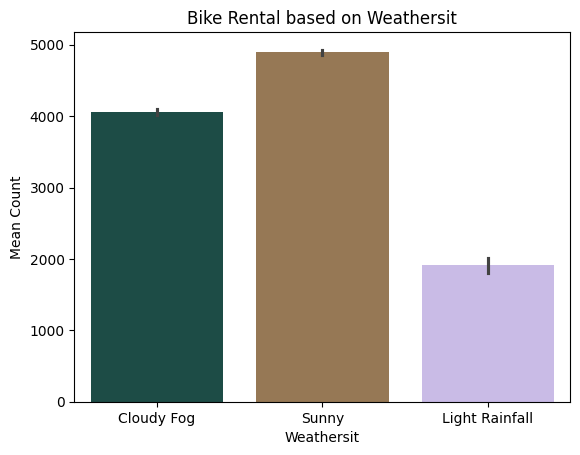

In [ ]:
sns.barplot(
    data=weathersit_rent,
    x='weathersit_day',
    y='cnt_day',
    hue='weathersit_day',
    palette='cubehelix'
)

plt.title('Bike Rental based on Weathersit')
plt.xlabel("Weathersit")
plt.ylabel("Mean Count")
plt.show()

Dari visualisasi grafik, bisa diketahui penyewaan terbanyak terjadi di cuaca cerah

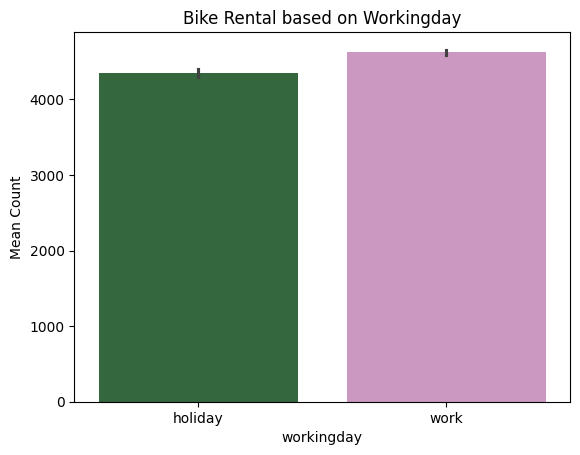

In [ ]:
sns.barplot(
    data=workingday_rent,
    x='workingday_day',
    y='cnt_day',
    hue='workingday_day',
    palette='cubehelix'
)

plt.title('Bike Rental based on Workingday')
plt.xlabel("workingday")
plt.ylabel("Mean Count")
plt.show()

Dari visualisasi grafik, bisa diketahui penyewaan terbanyak terjadi bukan di hari libur, melainkan di hari kerja

## Conclusion

**- Conclution pertanyaan 1**

Berdasarkan visualisasi yang ada, diketahui bahwa:
- Musim gugur (Fall) memiliki rata-rata penyewaan sepeda tertinggi.
> Musim gugur menawarkan cuaca yang ideal untuk bersepeda, tidak terlalu panas dan tidak terlalu dingin.


- Musim panas (Summer) dan dingin (Winter) memiliki rata-rata penyewaan cukup tinggi.
> Musim panas dan dingin memiliki periode liburan sekolah dan acara musiman yang mendorong orang untuk bersepeda.


- Musim semi (Spring) memiliki rata-rata penyewaan terendah.
> Musim semi memiliki curah hujan yang lebih tinggi dan suhu yang berubah-ubah, membuat bersepeda kurang nyaman.



**- Conclution pertanyaan 2**

Berdasarkan visualisasi yang ada, diketahui bahwa:

- Cuaca Cerah Meningkatkan Minat Bersepeda



> Rata-rata tingkat sewa sepeda lebih tinggi saat cuaca cerah.
Cuaca cerah meningkatkan kenyamanan bersepeda.
Kondisi udara dan jalanan lebih baik saat cuaca cerah.
Pemandangan sekitar lebih indah saat cuaca cerah.


- Cuaca Buruk Menurunkan Minat Bersepeda


> Rata-rata tingkat sewa sepeda lebih rendah saat cuaca berawan, berkabut, atau hujan.
Cuaca buruk menurunkan kenyamanan bersepeda.
Kondisi udara dan jalanan bisa lebih buruk saat cuaca buruk.
Pemandangan sekitar bisa kurang menarik saat cuaca buruk.


- Visualisasi menunjukkan korelasi positif antara cuaca cerah dan tingkat sewa sepeda.
Faktor lain seperti temperatur, kelembapan, dan angin juga bisa memengaruhi minat bersepeda.

- Hari kerja sebagai hari yang sesuai untuk menyewa sepeda
> Sepeda bisa digunakan sebagai transportasi, sehingga lebih banyak digunakan ketika hari kerja dan bukn hari libur
Selisih penyewaan di hari kerja dan hari libur tidak begitu jauh, namun masih tetap berguna untuk pengembangan dari tim pemasaran




